In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [ ]:
# import data
data = pd.read_csv("ACT.csv")

# Drop columns
to_delete = ["Timestamp", "College", "Race", "State"]
df = data.drop(columns=to_delete)

# Force One Hot Encode
df = df.replace("Did not graduate high school", 0)
df = df.replace("High School Diploma", 1)
df = df.replace("Bachelor's Degree", 2)
df = df.replace("Master's Degree", 3)
df = df.replace("Doctorate Degree", 4)
df = df.replace("Male", 0)
df = df.replace('Female', 1)
df = df.replace('No', 0)
df = df.replace('Yes', 1)
df = df.replace('Extrovert', 0)
df = df.replace('Introvert', 1)
df = df.fillna("unknown")

print(df.columns)

# Separate labels
y = df["Score"]
df = df.drop(columns=["Score"])
X = df

X = pd.get_dummies(X)

# Normalize input
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# X = X.to_numpy()
y = y.to_numpy()

Index(['Father Education', 'Mother Education', 'Gender', 'Graduation Year',
       'Tutoring', 'Honor Society', 'State Political Standing',
       'Home Language', 'Hispanic/Latino/Spanish', 'Native Hawaiian', 'White',
       'Asian', 'American Indian or Alaska Native', 'Medication', 'GPA',
       'Siblings', 'Clubs', 'Parents', 'Graduation Class Size',
       'Video Game Hours', 'Moved Out of State', 'Height',
       'Girlfriend/Boyfriend Count', 'AP/IB Classes', 'Times Taken ACT/SAT',
       'Sports', 'Sociality', 'Score'],
      dtype='object')


In [ ]:
means = np.ones_like(y) * np.mean(y)   # Array where every value is the mean of y
expected_error = mean_absolute_error(means,y)

print(f"If the model were to just guess the mean ACT score for each student")
print(f"the mean average error would be {expected_error}")
print(f"So we can treat {expected_error} like the baseline accuracy")

If the model were to just guess the mean ACT score for each student
the mean average error would be 3.3367039999999997
So we can treat 3.3367039999999997 like the baseline accuracy


In [ ]:
X2 = df.drop(columns=["Height"])
X2 = pd.get_dummies(X2)
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X2)

X3 = df.drop(columns=["Height", "Graduation Year", "Graduation Class Size"])
X3 = pd.get_dummies(X3)
scaler = MinMaxScaler()
X3 = scaler.fit_transform(X3)

In [ ]:
# MLP Regressor, comparing MAE with various features dropped

table_data = [["Features Excluded", "Training MAE", "Test MAE"]]

mean_train_MAE = 0
mean_test_MAE = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=987, shuffle=True)
    # Train the model
    regr = MLPRegressor(random_state=1, max_iter=10000)
    regr.fit(X_train, y_train)
    mean_train_MAE += mean_absolute_error(regr.predict(X_train), y_train)
    mean_test_MAE += mean_absolute_error(regr.predict(X_test), y_test)
table_data.append(["None", mean_train_MAE / 10, mean_test_MAE / 10])

mean_train_MAE = 0
mean_test_MAE = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, random_state=987, shuffle=True)
    # Train the model
    regr = MLPRegressor(random_state=1, max_iter=10000)
    regr.fit(X_train, y_train)
    mean_train_MAE += mean_absolute_error(regr.predict(X_train), y_train)
    mean_test_MAE += mean_absolute_error(regr.predict(X_test), y_test)
table_data.append(["Height", mean_train_MAE / 10, mean_test_MAE / 10])

mean_train_MAE = 0
mean_test_MAE = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.25, random_state=987, shuffle=True)
    # Train the model
    regr = MLPRegressor(random_state=1, max_iter=10000)
    regr.fit(X_train, y_train)
    mean_train_MAE += mean_absolute_error(regr.predict(X_train), y_train)
    mean_test_MAE += mean_absolute_error(regr.predict(X_test), y_test)
table_data.append(["Height, Graduation Year, and Graduation Class Size", mean_train_MAE / 10, mean_test_MAE / 10])


table = tabulate(table_data, headers="firstrow")
print(table)

Features Excluded                                     Training MAE    Test MAE
--------------------------------------------------  --------------  ----------
None                                                      0.139662     4.21912
Height                                                    0.117177     4.41251
Height, Graduation Year, and Graduation Class Size        0.18406      3.55114


In [ ]:
# MLP Regressor
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.25,
                                                    random_state=987, shuffle=True)


# Train the model
start = time.time()
regr = MLPRegressor(random_state=1, max_iter=10000)
regr.fit(X_train, y_train)
end = time.time()

# Print useful data
# print("Iterations Until Convergence: ", regr.n_iter_)
print("Training MAE: ", mean_absolute_error(regr.predict(X_train), y_train))
print("Test MAE: ", mean_absolute_error(regr.predict(X_test), y_test))
print(f"Time it took {end - start} seconds to make the prediction")

Training MAE:  0.18405973498685635
Test MAE:  3.5511354132864317
Time it took 9.913185834884644 seconds to make the prediction


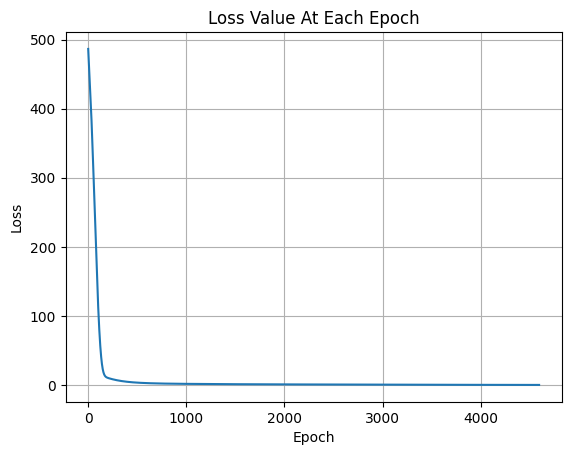

In [ ]:
# plot the loss value at each epoch
epochs = np.arange(0, regr.n_iter_)   # For each epoch
plt.plot(epochs, regr.loss_curve_)
plt.title('Loss Value At Each Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid() # add grid lines
plt.show() # show the plot

In [ ]:
#Iris with Loss Regularization
# Random 80/20 split of the data
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2)
# Data for the table
regularization_values = [0.001, 0.01, 0.1, 0.5]
num_iterations = []
training_accuracy = []
test_accuracy = []
best_losses = []
table_data = [["Regularization", "Iterations Till Convergence",	"Training MAE",
               "Test MAE", "Best loss value"]]

for regularization in regularization_values:   # For each regularization value
    # Train the model
    regr = MLPRegressor(hidden_layer_sizes = [64], activation = 'logistic',
                        solver = 'sgd', alpha = regularization, batch_size = 1,
                        learning_rate_init = 0.01, shuffle = True, momentum = 0,
                        n_iter_no_change = 50, max_iter=1000).fit(X_train, y_train)
    # record data about each iteration
    table_data.append([regularization, regr.n_iter_,
                       mean_absolute_error(regr.predict(X_train), y_train),
                       mean_absolute_error(regr.predict(X_test), y_test),
                       regr.best_loss_])

table = tabulate(table_data, headers="firstrow")
print(table)

  Regularization    Iterations Till Convergence    Training MAE    Test MAE    Best loss value
----------------  -----------------------------  --------------  ----------  -----------------
           0.001                            855         1.36807     3.71941            0.86222
           0.01                             132         2.72368     4.28747            3.89505
           0.1                              214         3.03018     3.64364            6.65059
           0.5                              205         3.23493     3.73974            7.8166


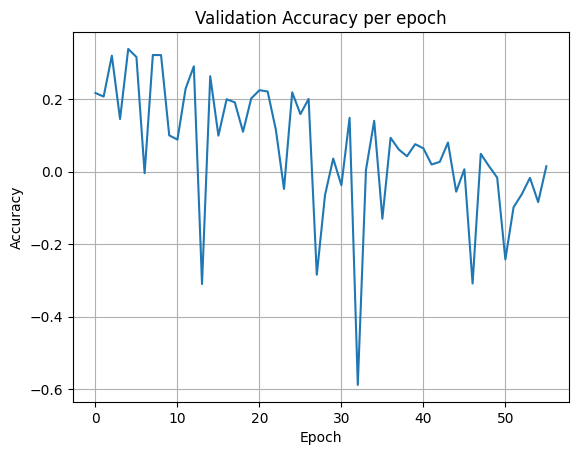

It looks like the test/validation accuracy is actually decreasing as the number of epochs intreaces
Once again this suggest that there are some problems with the data


In [ ]:
#Iris with early stopping and validation scores graph
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regr = MLPRegressor(hidden_layer_sizes = [64], activation = 'logistic',
                    solver = 'sgd', alpha = 0, batch_size = 1,
                    learning_rate_init = 0.01, shuffle = True, momentum = 0,
                    n_iter_no_change = 50, max_iter=1000, early_stopping=True,
                    validation_fraction=0.15).fit(X_train, y_train)

# plot the data
epochs = np.arange(0, regr.n_iter_)   # For each epoch
plt.plot(epochs, regr.validation_scores_)
plt.title('Validation Accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid() # add grid lines
plt.show() # show the plot

print("It looks like the test/validation accuracy is actually decreasing as the number of epochs intreaces")
print("Once again this suggest that there are some problems with the data")

In [ ]:
# Test training split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25)
input_size = np.shape(X_train)[0]

# Data to be used
learning_rates = [0.001, 0.01, 0.1, 0.5, 1, 10]
num_iterations = []
training_accuracy = []
test_accuracy = []
table_data = [["Learning Rate", "Epochs Till Convergence",	"Training MAE",
               "Test MAE"]]

for learning_rate in learning_rates:
    # Train the model
    regr = MLPRegressor(hidden_layer_sizes = [input_size * 2], shuffle = True,
                        momentum = 0, learning_rate_init = learning_rate,
                        activation = 'logistic', n_iter_no_change = 50,
                        max_iter = 5000)
    regr.fit(X_train, y_train)

    # record data about each iteration
    table_data.append([learning_rate, regr.n_iter_,
                       mean_absolute_error(regr.predict(X_train), y_train),
                       mean_absolute_error(regr.predict(X_test), y_test)])

table = tabulate(table_data, headers="firstrow")
print(table)
print("The learning rate does not seem to affect the test MAE much")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Learning Rate    Epochs Till Convergence    Training MAE    Test MAE
---------------  -------------------------  --------------  ----------
          0.001                       5000        0.42803      3.85854
          0.01                        1738        0.126946     3.9215
          0.1                          543        0.04073      3.63319
          0.5                         1396        0.690884     3.28435
          1                            578        2.18188      3.64395
         10                           1997       74.2805      75.0485
The learning rate does not seem to affect the test MAE much


In [ ]:
# Train with different numbers of hidden nodes

# Test training split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Data to be used
hidden_nodes = [8, 16, 32, 64, 128, 256, 512, 1024]
num_iterations = []
training_accuracy = []
test_accuracy = []
table_data = [["Hidden Nodes", "Epochs Till Convergence",	"Training MAE",
               "Test MAE"]]

for hidden_node in hidden_nodes:
    # Train the model
    regr = MLPRegressor(hidden_layer_sizes = [hidden_node], shuffle = True,
                        momentum = 0, learning_rate_init = 0.5,
                        activation = 'logistic', n_iter_no_change = 50,
                        max_iter = 5000)
    # regr = MLPRegressor(hidden_layer_sizes = [hidden_node], shuffle = True,
    #                     momentum = 0, learning_rate_init = 0.5,
    #                     activation = 'logistic', n_iter_no_change = 50,
    #                     max_iter = 5000)
    regr.fit(X_train, y_train)

    # record data about each iteration
    table_data.append([hidden_node, regr.n_iter_,
                       mean_absolute_error(regr.predict(X_train), y_train),
                       mean_absolute_error(regr.predict(X_test), y_test)])

table = tabulate(table_data, headers="firstrow")
print(table)
print("The number of hidden nodes does not seem to affect the test MAE much")

  Hidden Nodes    Epochs Till Convergence    Training MAE    Test MAE
--------------  -------------------------  --------------  ----------
             8                        160       3.27329       3.51819
            16                        155       3.27426       3.51947
            32                        172       3.27299       3.5178
            64                        191       3.27337       3.5183
           128                        925       1.5441        4.12632
           256                        833       0.675615      3.3978
           512                       1761       0.193895      3.32891
          1024                       3046       0.0435624     3.3776
The number of hidden nodes does not seem to affect the test MAE much


In [ ]:
# Train with different momentum values
# Train with different numbers of hidden nodes

# Test training split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
input_size = np.shape(X_train)[0]

# Data to be used
momentums = [0, 0.01, 0.1, 0.5, 0.9, 0.99, 1]
num_iterations = []
training_accuracy = []
test_accuracy = []
table_data = [["Momentum", "Epochs Till Convergence", "Training MAE",
               "Test MAE"]]

for momentum in momentums:
    # Train the model
    regr = MLPRegressor(hidden_layer_sizes = [256], solver = "sgd",
                        momentum = momentum, learning_rate_init = 0.1,
                        activation = 'logistic', n_iter_no_change = 50,
                        max_iter = 1500, shuffle = True)
    regr.fit(X_train, y_train)

    # record data about each iteration
    table_data.append([momentum, regr.n_iter_,
                       mean_absolute_error(regr.predict(X_train), y_train),
                       mean_absolute_error(regr.predict(X_test), y_test)])

table = tabulate(table_data, headers="firstrow")
print(table)

print("A nonzero momentum is the only thing the seemed to reduce the test MAE")
print("But, the different possible values for momentum don't make much a difference")

  Momentum    Epochs Till Convergence    Training MAE    Test MAE
----------  -------------------------  --------------  ----------
      0                           123         3.40549     3.18397
      0.01                        122         3.40549     3.18397
      0.1                         117         3.40548     3.18395
      0.5                          85         3.40547     3.18394
      0.9                          61         3.42287     3.22083
      0.99                         61         4.74175     4.95307
      1                            61         5.49231     5.81527
A nonzero momentum is the only thing the seemed to reduce the test MAE
But, the different possible values for momentum don't make much a difference


In [ ]:
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
distributions = dict(learning_rate_init=uniform(loc=0.001, scale=0.099), #loc is the min val, and loc + scale is the max val
                    hidden_layer_sizes = ([8], [256], [512]), #since there is no distribution it samples these values uniformly
                    momentum=uniform(loc=0,scale =.99))
search = RandomizedSearchCV(clf, distributions, n_iter=10)
search.fit(X3,y)
print(search.best_params_)
print(search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
print("These new hyperparemeters seem counterintuitive.")
print("It seems like they are making the model try to learn less.")
print("whatever increases the training accurayc seems to decrease the test accuracy")
print("This suggests that there is problems with the data.")


# Train the model with the new "best" hyperparemeters
start = time.time()
regr = MLPRegressor(hidden_layer_sizes=[8], learning_rate_init=0.04,
                    momentum=0.5616793163423973, max_iter=1000)
regr.fit(X_train, y_train)
end = time.time()

# Print useful data
print("Iterations Until Convergence: ", regr.n_iter_)
print("Training MAE: ", mean_absolute_error(regr.predict(X_train), y_train))
print("Test MAE: ", mean_absolute_error(regr.predict(X_test), y_test))
print(f"Time it took {end - start} seconds to make the prediction")

print("This is worse than baseline. So, improvement needs to be done")

These new hyperparemeters seem counterintuitive.
It seems like they are making the model try to learn less.
whatever increases the training accurayc seems to decrease the test accuracy
This suggests that there is problems with the data.
Iterations Until Convergence:  39
Training MAE:  3.439048560574065
Test MAE:  5.354486511715363
Time it took 0.10993671417236328 seconds to make the prediction
This is worse than baseline. So, improvement needs to be done


X
Normalization and no distance weighting
0.27318323152379387
0.26863009592326137
2.6225
Normalization and distance weighting
0.999999999999997
0.10988825128372592
2.798022314218843

X2
Normalization and no distance weighting
0.29335069687240034
0.19114670057708527
2.67
Normalization and distance weighting
0.9999999999999978
0.1906894220150247
2.7694912700521197

X3
Normalization and no distance weighting
0.31357695459221513
0.10730515438247012
3.0775
Normalization and distance weighting
0.999999999999996
0.2817659434771542
2.6721458167286665

  K Value    Mean Absolute Error
---------  ---------------------
        1                3.76
        2                2.93425
        3                2.9554
        4                3.07456
        5                3.07365
        6                2.94006
        7                2.90442
        8                2.8582
        9                2.88596
       10                2.87195
       11                2.97202
       12                3

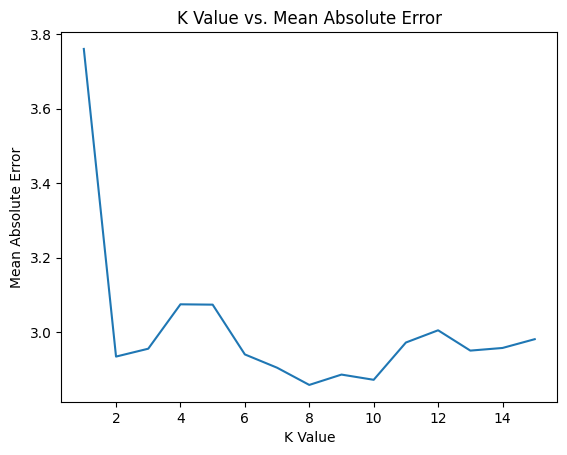

In [ ]:
# KNN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

print("X")

# Normalization and no distance weighting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)
knn2 = KNeighborsRegressor(n_neighbors=8, weights='uniform', algorithm='auto').fit(X_train, y_train)
print("Normalization and no distance weighting")
print(knn2.score(X_train, y_train))
print(knn2.score(X_test, y_test))
print(mean_absolute_error(y_test, knn2.predict(X_test)))

# Normalization and distance weighting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)
knn3 = KNeighborsRegressor(n_neighbors=8, weights='distance', algorithm='auto').fit(X_train, y_train)
print("Normalization and distance weighting")
print(knn3.score(X_train, y_train))
print(knn3.score(X_test, y_test))
print(mean_absolute_error(y_test, knn3.predict(X_test)))
print()


print("X2")
# Normalization and no distance weighting
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.20, shuffle=True)
knn2 = KNeighborsRegressor(n_neighbors=8, weights='uniform', algorithm='auto').fit(X_train, y_train)
print("Normalization and no distance weighting")
print(knn2.score(X_train, y_train))
print(knn2.score(X_test, y_test))
print(mean_absolute_error(y_test, knn2.predict(X_test)))

# Normalization and distance weighting
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.20, shuffle=True)
knn3 = KNeighborsRegressor(n_neighbors=8, weights='distance', algorithm='auto').fit(X_train, y_train)
print("Normalization and distance weighting")
print(knn3.score(X_train, y_train))
print(knn3.score(X_test, y_test))
print(mean_absolute_error(y_test, knn3.predict(X_test)))
print()

print("X3")
# Normalization and no distance weighting
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.20, shuffle=True)
knn2 = KNeighborsRegressor(n_neighbors=8, weights='uniform', algorithm='auto').fit(X_train, y_train)
print("Normalization and no distance weighting")
print(knn2.score(X_train, y_train))
print(knn2.score(X_test, y_test))
print(mean_absolute_error(y_test, knn2.predict(X_test)))

# Normalization and distance weighting
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.20, shuffle=True)
knn3 = KNeighborsRegressor(n_neighbors=8, weights='distance', algorithm='auto').fit(X_train, y_train)
print("Normalization and distance weighting")
print(knn3.score(X_train, y_train))
print(knn3.score(X_test, y_test))
print(mean_absolute_error(y_test, knn3.predict(X_test)))
print()

k_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
k_results = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)
for each in k_values:
  knn4 = KNeighborsRegressor(n_neighbors=each, weights='distance', algorithm='auto').fit(X_train, y_train)
  k_result = [each, mean_absolute_error(y_test, knn4.predict(X_test))]
  k_results.append(k_result)

headers = ["K Value", "Mean Absolute Error"]
print(tabulate(k_results, headers=headers))
print()

#graph
k_values_plot, test_accuracy_plot = zip(*k_results)
plt.plot(k_values_plot, test_accuracy_plot)
plt.title("K Value vs. Mean Absolute Error")
plt.xlabel("K Value")
plt.ylabel("Mean Absolute Error")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

#No input normalization and no distance weighting
print("X")
knn1 = KNeighborsRegressor().fit(X_train, y_train)
print("Normal KNN")
print(knn1.score(X_train, y_train))
print(knn1.score(X_test, y_test))
print(mean_absolute_error(y_test, knn1.predict(X_test)))

X
Normal KNN
0.38733409265242547
0.12958972977825667
3.0039999999999996


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Placeholder for storing results
results_uniform = []
results_distance = []

# Run the experiment 10 times
for _ in range(100):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

    # Normalization and no distance weighting
    knn_uniform = KNeighborsRegressor(n_neighbors=8, weights='uniform', algorithm='auto').fit(X_train, y_train)
    mae_uniform = mean_absolute_error(y_test, knn_uniform.predict(X_test))
    results_uniform.append(mae_uniform)

    # Normalization and distance weighting
    knn_distance = KNeighborsRegressor(n_neighbors=8, weights='distance', algorithm='auto').fit(X_train, y_train)
    mae_distance = mean_absolute_error(y_test, knn_distance.predict(X_test))
    results_distance.append(mae_distance)

# Calculate average MAE for each case
average_mae_uniform = np.mean(results_uniform)
average_mae_distance = np.mean(results_distance)

# Print the results in a table
print("Results:")
print("| Condition                       | Average MAE |")
print("|----------------------------------|-------------|")
print(f"| Normalization and no weighting   | {average_mae_uniform:.4f}    |")
print(f"| Normalization and distance weight | {average_mae_distance:.4f}    |")


Results:
| Condition                       | Average MAE |
|----------------------------------|-------------|
| Normalization and no weighting   | 2.9267    |
| Normalization and distance weight | 2.9297    |


In [ ]:
# Cluster

In [ ]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
i = 2
num_clusters = []
silhouette_scores = []
table_data = [['Clusters', 'Silhouette Score']]
while i < 10:
    kmean = KMeans(n_clusters=i, init='random', n_init=10)
    kmean.fit(X_train, y_train)
    table_data.append([i, silhouette_score(X_train, kmean.labels_)])
    i += 1

table = tabulate(table_data, headers="firstrow")
print(table)

  Clusters    Silhouette Score
----------  ------------------
         2           0.0656612
         3           0.0631032
         4           0.0534124
         5           0.0458686
         6           0.0491924
         7           0.0494795
         8           0.0612135
         9           0.0450198


In [ ]:
i = 0
linkage = ['single', 'average', 'complete', 'ward']
final = []
while i < 5:
    for link in linkage:
        HAC = AgglomerativeClustering(n_clusters=i+2, linkage=link)
        HAC.fit(X_train, y_train)
        output = [i + 2, link, silhouette_score(X_train, HAC.labels_)]
        final.append(output)
    i += 1

headers = ['k', 'Linkage', 'Silhouette Score']
table = tabulate(final, headers=headers)
print(table)

  k  Linkage      Silhouette Score
---  ---------  ------------------
  2  single              0.139887
  2  average             0.108701
  2  complete            0.0361678
  2  ward                0.0503045
  3  single              0.0772353
  3  average             0.0753562
  3  complete            0.0322249
  3  ward                0.0525497
  4  single              0.0487152
  4  average             0.0639734
  4  complete            0.0259285
  4  ward                0.0379563
  5  single              0.0320778
  5  average             0.0509954
  5  complete            0.0277354
  5  ward                0.044512
  6  single              0.0296488
  6  average             0.0571501
  6  complete            0.0263972
  6  ward                0.0380322


In [ ]:
# Decision Tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

num_nodes = regressor.tree_.node_count
num_leaves = sum(regressor.apply(X_train) == i for i in range(num_nodes))
max_depth = regressor.tree_.max_depth

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

fig = plt.figure(figsize=(125,100))
plot_tree(regressor, filled=True)

print("Tree Statistics:")
print("Number of Nodes:", num_nodes)
print("Number of Leaf Nodes:", num_leaves)
print("Max Depth:", max_depth)

print("\nMean Absolute Error:")
print("Training Set MAE:", mae_train)
print("Test Set MAE:", mae_test)

print("\nCoefficient of Determination:")
print("Training Set:", r2_train)
print("Test Set:", r2_test)
print("The tree doesn't seem like it is super shallow, but the Test Set MAE is worse than baseline accuracy, so that might indicate there is something wrong with our data")

Tree Statistics:
Number of Nodes: 297
Number of Leaf Nodes: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Max Depth: 17

Mean Absolute Error:
Training Set MAE: 0.0
Test Set MAE: 3.48

Coefficient of Determination:
Training Set: 1.0
Test Set: -0.4249744057995073
The tree doesn't seem like it is super shallow, but the Test Set MAE is worse than baseline accuracy, so that might indicate there is something wrong with our data


In [ ]:
#X1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

num_nodes = regressor.tree_.node_count
num_leaves = sum(regressor.apply(X_train) == i for i in range(num_nodes))
max_depth = regressor.tree_.max_depth

print("Default Tree Metrics:")
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Tree Statistics:")
print("Number of Nodes:", num_nodes)
print("Number of Leaf Nodes:", num_leaves)
print("Max Depth:", max_depth)

print("\nMean Absolute Error:")
print("Training Set MAE:", mae_train)
print("Test Set MAE:", mae_test)

print("\nCoefficient of Determination:")
print("Training Set:", r2_train)
print("Test Set:", r2_test)

param_values = {
    'min_samples_leaf': [1, 5, 10, 15, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_impurity_decrease': [0.0, 0.01, 0.02],
    'max_depth': [None, 3, 5, 10],
    'max_leaf_nodes': [None, 10, 20],
    'max_features': [None, 'sqrt', 'log2']
}

for param_name, values in param_values.items():
    for value in values:
        print(f"\nExperimenting with {param_name}={value}:")
        regressor = DecisionTreeRegressor(**{param_name: value})
        regressor.fit(X_train, y_train)
        num_nodes = regressor.tree_.node_count
        num_leaves = sum(regressor.apply(X_train) == i for i in range(num_nodes))
        max_depth = regressor.tree_.max_depth
        y_train_pred = regressor.predict(X_train)
        y_test_pred = regressor.predict(X_test)
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        print("Tree Statistics:")
        print("Number of Nodes:", num_nodes)
        print("Number of Leaf Nodes:", num_leaves)
        print("Max Depth:", max_depth)

        print("\nMean Absolute Error:")
        print("Training Set MAE:", mae_train)
        print("Test Set MAE:", mae_test)

        print("\nCoefficient of Determination:")
        print("Training Set:", r2_train)
        print("Test Set:", r2_test)

print("The only one of these that seemed to help at all in my testing is the min_samples_leaf parameter which is basically a form of early stopping. This might indicate that we may be overfitting the problem.")
print("We're still not getting great results though, the best I saw with all my testing was a MAE of 2.83 which is only slightly better than guessing. We might need to look at feature selection.")

Default Tree Metrics:
Tree Statistics:
Number of Nodes: 291
Number of Leaf Nodes: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Max Depth: 17

Mean Absolute Error:
Training Set MAE: 0.0
Test Set MAE: 3.64

Coefficient of Determination:
Training Set: 1.0
Test Set: -0.6407957721147726

Experimenting with min_samples_leaf=1:
Tree Statistics:
Number of Nodes: 295
Number of Leaf Nodes: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [ ]:
#X2
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

num_nodes = regressor.tree_.node_count
num_leaves = sum(regressor.apply(X_train) == i for i in range(num_nodes))
max_depth = regressor.tree_.max_depth

print("Default Tree Metrics:")
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Tree Statistics:")
print("Number of Nodes:", num_nodes)
print("Number of Leaf Nodes:", num_leaves)
print("Max Depth:", max_depth)

print("\nMean Absolute Error:")
print("Training Set MAE:", mae_train)
print("Test Set MAE:", mae_test)

print("\nCoefficient of Determination:")
print("Training Set:", r2_train)
print("Test Set:", r2_test)

param_values = {
    'min_samples_leaf': [1, 5, 10, 15, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_impurity_decrease': [0.0, 0.01, 0.02],
    'max_depth': [None, 3, 5, 10],
    'max_leaf_nodes': [None, 10, 20],
    'max_features': [None, 'sqrt', 'log2']
}

for param_name, values in param_values.items():
    for value in values:
        print(f"\nExperimenting with {param_name}={value}:")
        regressor = DecisionTreeRegressor(**{param_name: value})
        regressor.fit(X_train, y_train)
        num_nodes = regressor.tree_.node_count
        num_leaves = sum(regressor.apply(X_train) == i for i in range(num_nodes))
        max_depth = regressor.tree_.max_depth
        y_train_pred = regressor.predict(X_train)
        y_test_pred = regressor.predict(X_test)
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        print("Tree Statistics:")
        print("Number of Nodes:", num_nodes)
        print("Number of Leaf Nodes:", num_leaves)
        print("Max Depth:", max_depth)

        print("\nMean Absolute Error:")
        print("Training Set MAE:", mae_train)
        print("Test Set MAE:", mae_test)

        print("\nCoefficient of Determination:")
        print("Training Set:", r2_train)
        print("Test Set:", r2_test)

print("The only one of these that seemed to help at all in my testing is the min_samples_leaf parameter which is basically a form of early stopping. This might indicate that we may be overfitting the problem.")
print("We're still not getting great results though, the best I saw with all my testing was a MAE of 2.83 which is only slightly better than guessing. We might need to look at feature selection.")

Default Tree Metrics:
Tree Statistics:
Number of Nodes: 297
Number of Leaf Nodes: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Max Depth: 17

Mean Absolute Error:
Training Set MAE: 0.0
Test Set MAE: 3.66

Coefficient of Determination:
Training Set: 1.0
Test Set: -0.799894856257436

Experimenting with min_samples_leaf=1:
Tree Statistics:
Number of Nodes: 297
Number of Leaf Nodes: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
#X3
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

num_nodes = regressor.tree_.node_count
num_leaves = sum(regressor.apply(X_train) == i for i in range(num_nodes))
max_depth = regressor.tree_.max_depth

print("Default Tree Metrics:")
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Tree Statistics:")
print("Number of Nodes:", num_nodes)
print("Number of Leaf Nodes:", num_leaves)
print("Max Depth:", max_depth)

print("\nMean Absolute Error:")
print("Training Set MAE:", mae_train)
print("Test Set MAE:", mae_test)

print("\nCoefficient of Determination:")
print("Training Set:", r2_train)
print("Test Set:", r2_test)

param_values = {
    'min_samples_leaf': [1, 5, 10, 15, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_impurity_decrease': [0.0, 0.01, 0.02],
    'max_depth': [None, 3, 5, 10],
    'max_leaf_nodes': [None, 10, 20],
    'max_features': [None, 'sqrt', 'log2']
}

for param_name, values in param_values.items():
    for value in values:
        print(f"\nExperimenting with {param_name}={value}:")
        regressor = DecisionTreeRegressor(**{param_name: value})
        regressor.fit(X_train, y_train)
        num_nodes = regressor.tree_.node_count
        num_leaves = sum(regressor.apply(X_train) == i for i in range(num_nodes))
        max_depth = regressor.tree_.max_depth
        y_train_pred = regressor.predict(X_train)
        y_test_pred = regressor.predict(X_test)
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        print("Tree Statistics:")
        print("Number of Nodes:", num_nodes)
        print("Number of Leaf Nodes:", num_leaves)
        print("Max Depth:", max_depth)

        print("\nMean Absolute Error:")
        print("Training Set MAE:", mae_train)
        print("Test Set MAE:", mae_test)

        print("\nCoefficient of Determination:")
        print("Training Set:", r2_train)
        print("Test Set:", r2_test)

print("The only one of these that seemed to help at all in my testing is the min_samples_leaf parameter which is basically a form of early stopping. This might indicate that we may be overfitting the problem.")
print("We're still not getting great results though, the best I saw with all my testing was a MAE of 2.83 which is only slightly better than guessing. We might need to look at feature selection.")

Default Tree Metrics:
Tree Statistics:
Number of Nodes: 307
Number of Leaf Nodes: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Max Depth: 16

Mean Absolute Error:
Training Set MAE: 0.0
Test Set MAE: 3.24

Coefficient of Determination:
Training Set: 1.0
Test Set: -0.32536454442323115

Experimenting with min_samples_leaf=1:
Tree Statistics:
Number of Nodes: 303
Number of Leaf Nodes: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

# Decision Tree Results #

Default Settings:


X1 (All Features) - 3.64

X2 (Removed Height) - 3.66

X3 (Removed Height, Graduation Class Size, and Graduation year) - 3.24


Max Depth = 3:


X1 (All Features) - 2.59

X2 (Removed Height) - 2.43

X3 (Removed Height, Graduation Class Size, and Graduation year) - 2.41


min_samples_leaf = 30:


X1 (All Features) - 2.41

X2 (Removed Height) - 2.41

X3 (Removed Height, Graduation Class Size, and Graduation year) - 2.41


max_leaf_nodes = 10:


X1 (All Features) - 3.11

X2 (Removed Height) - 3.03

X3 (Removed Height, Graduation Class Size, and Graduation year) - 2.64


max_features = log2:


X1 (All Features) - 3.84

X2 (Removed Height) - 4.02

X3 (Removed Height, Graduation Class Size, and Graduation year) - 3.48

In [ ]:
table_data = [["Model", "Training MAE", "Test MAE"]]

mean1 = 0
mean2 = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.25, random_state=i+42, shuffle=True)
    # regr = MLPRegressor(random_state=1, max_iter=15000, alpha=0.01,
    #                     learning_rate_init = 0.06932045683077867,
    #                     hidden_layer_sizes = [512], momentum=0.6515870013745694)
    regr = MLPRegressor(hidden_layer_sizes = [512], shuffle = True,
                        momentum = 0, learning_rate_init = 0.1,
                        activation = 'logistic', n_iter_no_change = 50,
                        max_iter = 5000)

    regr.fit(X_train, y_train)
    mean1 += mean_absolute_error(regr.predict(X_train), y_train)
    mean2 += mean_absolute_error(regr.predict(X_test), y_test)
table_data.append(["MLP", mean1 / 10, mean2 / 10])


mean1 = 0
mean2 = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.25, random_state=i+42, shuffle=True)
    regr = KNeighborsRegressor(n_neighbors=8, weights='uniform', algorithm='auto')
    regr.fit(X_train, y_train)
    mean1 += mean_absolute_error(regr.predict(X_train), y_train)
    mean2 += mean_absolute_error(regr.predict(X_test), y_test)
table_data.append(["KNN", mean1 / 10, mean2 / 10])

mean1 = 0
mean2 = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.25, random_state=i+42, shuffle=True)
    regr = DecisionTreeRegressor(min_samples_leaf=30, max_depth=3, max_leaf_nodes=10)
    regr.fit(X_train, y_train)
    mean1 += mean_absolute_error(regr.predict(X_train), y_train)
    mean2 += mean_absolute_error(regr.predict(X_test), y_test)
table_data.append(["DT", mean1 / 10, mean2 / 10])


table = tabulate(table_data, headers="firstrow")
print(table)

Model      Training MAE    Test MAE
-------  --------------  ----------
MLP           0.0587868     3.87563
KNN           2.50622       2.99087
DT            2.57265       2.84098
